In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd

data = pd.read_csv("Daily_Demand_Forecasting_Orders.csv", delimiter=";")

data = data.rename(columns={
    "Week of the month (first week, second, third, fourth or fifth week": "Week_of_Month",
    "Day of the week (Monday to Friday)": "Day_of_Week",
    "Non-urgent order": "Non_Urgent",
    "Urgent order": "Urgent",
    "Order type A": "Type_A",
    "Order type B": "Type_B",
    "Order type C": "Type_C",
    "Fiscal sector orders": "Fiscal_Sector_Orders",
    "Orders from the traffic controller sector": "Traffic_Controller_Sector_Orders",
    "Banking orders (1)": "Banking_T1",
    "Banking orders (2)": "Banking_T2",
    "Banking orders (3)": "Banking_T3",
    "Target (Total orders)": "Total_Orders_for_Daily_Treatment"
})

data.head()

,Week_of_Month,Day_of_Week,Non_Urgent,Urgent,Type_A,Type_B,Type_C,Fiscal_Sector_Orders,Traffic_Controller_Sector_Orders,Banking_T1,Banking_T2,Banking_T3,Total_Orders_for_Daily_Treatment
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [6]:
data.describe()

,Week_of_Month,Day_of_Week,Non_Urgent,Urgent,Type_A,Type_B,Type_C,Fiscal_Sector_Orders,Traffic_Controller_Sector_Orders,Banking_T1,Banking_T2,Banking_T3,Total_Orders_for_Daily_Treatment
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


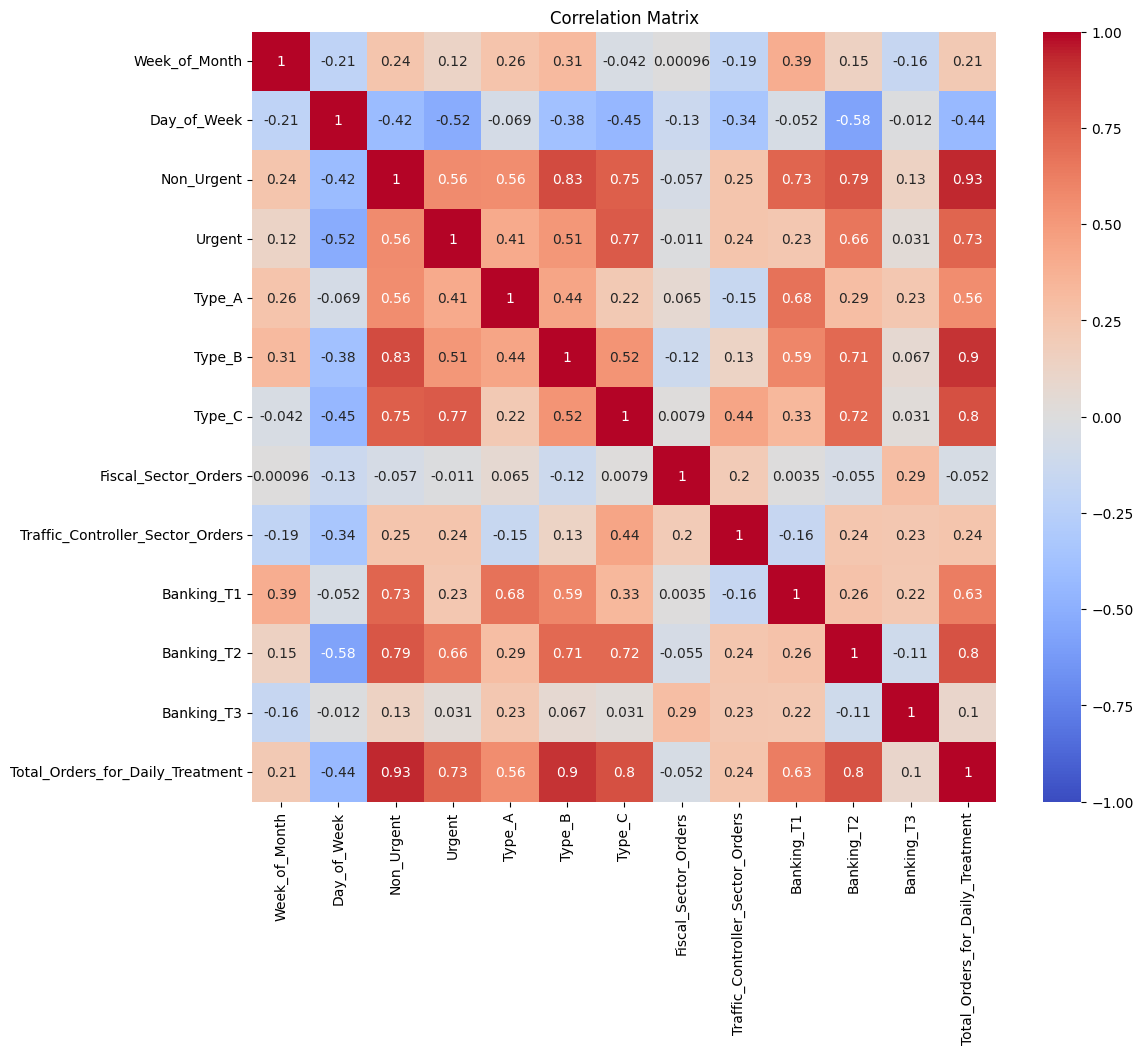

In [7]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Total Orders:

**VERY strong positive correlation with Non_Urgent (0.93), Type_B (0.9), and Type_C (0.8).** 
    
*(Which suggests that the total number of orders is heavily driven by the number of non-urgent orders and orders of type B and C.)*

**Strong positive:**  *Urgent (0.73) and Banking_T2 (0.8)*

**Moderate positive:** *Type_A (0.56) and Banking_T1 (0.63)*

**Weak positive:** *Week of Month (0.21) and Banking_T3 (0.1)*

**Weak negative:** *Day_of_Week (-0.44) and Fiscal_Sector_Orders (-0.052)*

## Non_Urgent Orders 

**Strong positive:** *Type_B (0.83) and Type_C (0.75), Banking_T2 (0.79) and Banking_T1 (0.73)*

## Urgent Orders 

**Strong positive:** *Type_C (0.77), Banking_T2 (0.66), and Banking_T1 (0.68)*

## Day of the Week:

**Moderate negative:** *Non_Urgent (-0.42) and Urgent (-0.52)*

*This is suggesting that on certain days of the week, the number of non-urgent and urgent orders tends to be lower.*

**Moderate positive:** *Banking_T2 (0.58)* 

**Strong negative:** *Banking_T3 (-0.75)*

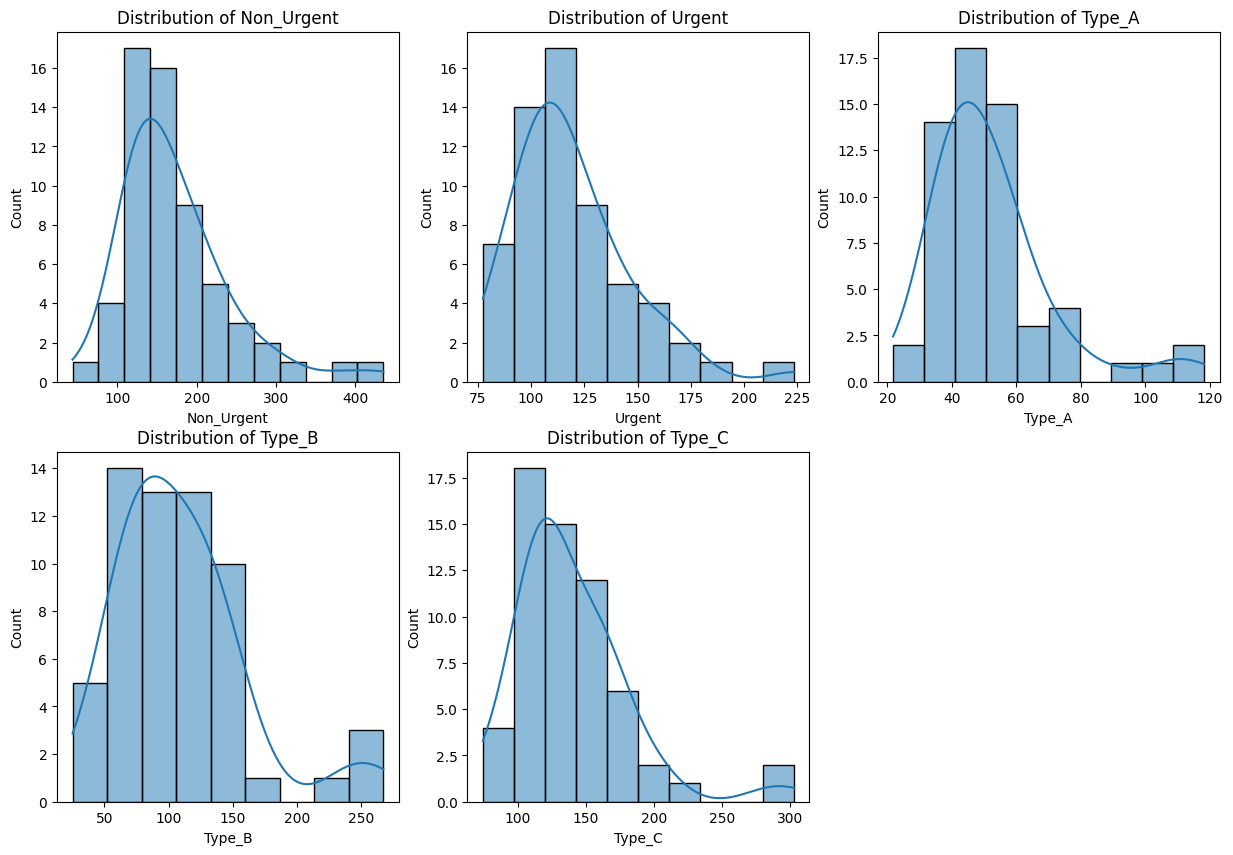

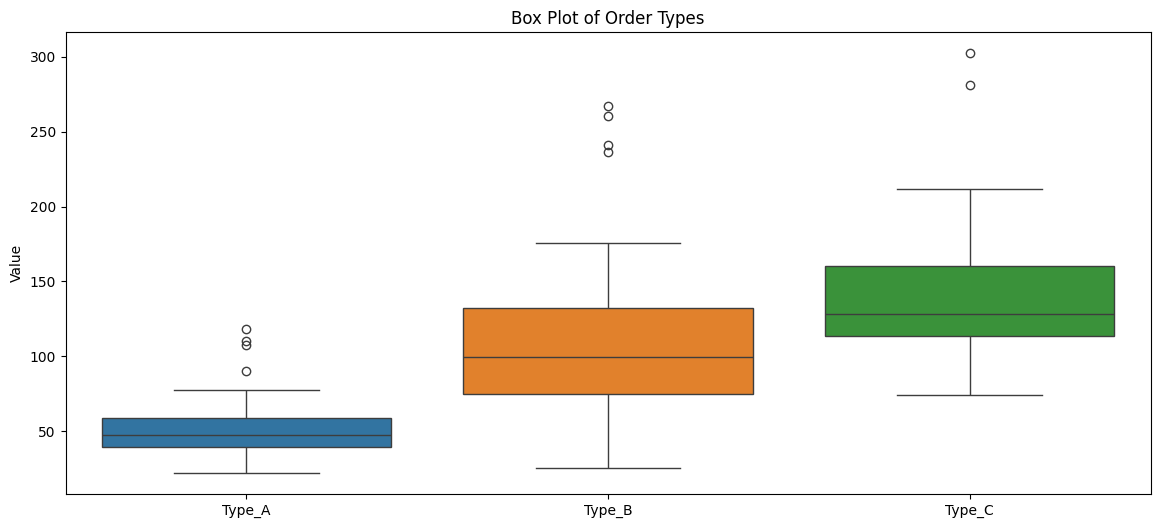

In [15]:
# Histograms for distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Non_Urgent', 'Urgent', 'Type_A', 'Type_B', 'Type_C']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

# Box plots for order types
plt.figure(figsize=(14, 6))
order_types = data[['Type_A', 'Type_B', 'Type_C']]
sns.boxplot(data=order_types)
plt.title('Box Plot of Order Types')
plt.ylabel('Value')
plt.show()


<Figure size 1400x800 with 0 Axes>

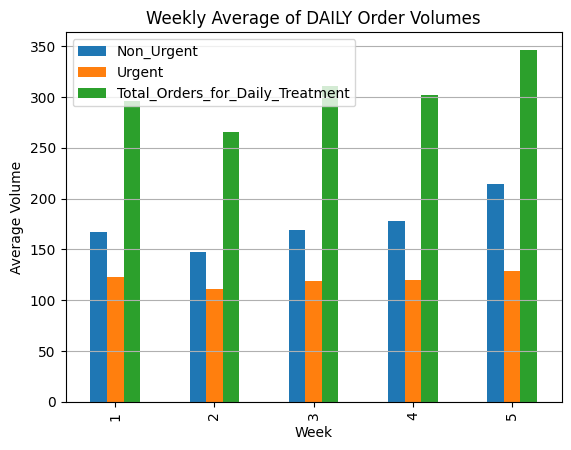

In [16]:
weekly_avg = data.groupby('Week_of_Month').mean()
weekly_avg = weekly_avg.drop('Day_of_Week', axis=1)  # Remove day column from averages

plt.figure(figsize=(14, 8))
weekly_avg[['Non_Urgent', 'Urgent', 'Total_Orders_for_Daily_Treatment']].plot(kind='bar')
plt.title('Weekly Average of DAILY Order Volumes')
plt.ylabel('Average Volume')
plt.xlabel('Week')
plt.grid(axis='y')
plt.show()
